(unit4.7)=
# Unit 4.7: Transfer Functions for Circuit Analysis

The preparatory reading for this section is [Chapter 4.4](https://ebookcentral.proquest.com/lib/swansea-ebooks/reader.action?docID=3384197&ppg=75#ppg=113) {cite}`karris` which discusses transfer function models of electrical circuits. We have also adapted content from [3.6 The System Function](https://www.accessengineeringlibrary.com/content/book/9781260454246/toc-chapter/chapter3/section/section28) from {cite}`schaum`.

Follow along at [cpjobling.github.io/eg-150-textbook/laplace_transform/6/transfer_functions](https://cpjobling.github.io/eg-150-textbook/laplace_transform/6/transfer_functions)

![QR Code for this lecture](pictures/qrcode_laplace6.png)

## Agenda

* {ref}`system_function`

* {ref}`char_LTI_systems`

* {ref}`Transfer Functions

* {ref}`circ_tf`

* Circuit Analysis Using MATLAB LTI Transfer Function Block

* Circuit Simulation Using Simulink Transfer Function Block

In [1]:
% Initialize MATLAB
clearvars
cd ../matlab 
pwd
format compact


ans =

    '/Users/eechris/code/src/github.com/cpjobling/eg-150-textbook/laplace_transform/matlab'



(system_function)=
## The Transfer Function

In {ref}`Response_of_a_Continuous_Time_LTI_System_and_the_Convolution_Integral` we showed that the output $y(t)$ of a continuous-time LTI system equals the convolution of the input $x(t)$ with the impulse response $h(t)$; that is,

$$y(t) = x(t) * h(t)$$ (eq:335)

Applying the {ref}`lap3:conv` property, we obtain

$$Y(s) = X(s)H(s)$$ (eq:336)

where $Y(s)$, $X(s)$, and $H(s)$ are the Laplace transforms of $y(t)$, $x(t)$, and $h(t)$, respectively.

Equation {eq}`eq:336` can be expressed as

$$H(s) = \frac{Y(s)}{X(s)}$$ (eq:337)

The laplace transform $H(s)$ of $h(t)$ is called the *transfer function* (or *system function*) of the system.

By {eq}`eq:337`, the transfer function $H(s)$ can also be defined as the ratio of the Laplace transforms of the output $y(t)$ and the input $x(t)$.

The transfer function $H(s)$ completely characterizes the system because the impulse response $h(t)$ completely characterizes the system.

{numref}`fig:3-7` illustrates the relationship of Equations {ex}`eq:335` and {ex}`eq:336`.

:::{figure-md} fig:3-7
<img src="pictures/system_function.png" alt="Impulse response and system function." width="60%">

Impulse response and system function
:::

(char_LTI_systems)=
## Characterization of LTI Systems

```{note}
This section is for reference only and is not examinable.
```

Many properties of continuous-time LTI systems can be closely associated with the characteristics of $H(s)$ in the $s$-plane and in particular with the pole locations and the region of convergence (ROC).

(hs_casuality)=
### Causality

Fot a causal continuous-time LTI system, we have

$$h(t) = 0\qquad t<0$$

Since $h(t)$ is a right-sided signal, the corresponding requirement on $H(s)$ is that the ROC of $H(s)$ must be of the form

$$\mathrm{Re}(s) > \sigma_\mathrm{max}$$

That is, the ROC is the region in the $s$-plane to the right of all the system poles. Similarly, if the system is anticausal, then

$$h(t) = 0\qquad t>0$$

and $h(t)$ is left-sided. Thus, the ROC of $H(s)$ must be of the form 

$$\mathrm{Re}(s) < \sigma_\mathrm{max}$$

That is, the ROC is the region in the $s$-plane to the left of all the system poles.

(hs_stability)=
### Stability

In {ref}`c_Stability` we stated that a continuous-time LTI system is BIBO stable if and only if [Eq. {eq}`eq:221`]

$$\int_{-\infty}^{\infty}\left|h(\tau)\right|\,d\tau \lt \infty$$

The corresponding requirement on $H(s)$ is that the ROC of $H(s)$ contains the $j\omega$ axis (that is $s = j\omega). This is key result, proved in Prob. 3.26 in {ref}`schaum`, that is fundamental to systems and control theory. 

(hs_causal_and_stable)=
### Causal and stable systems
If a system is both causal and stable then all the poles must be in the left-half of the $s$-plane: that is they all have negative real parts because the ROC is of the form $\mathrm{Re}(s) > \sigma_\mathrm{max}$ and since the $j\omega$ axis is included in the ROC, we must have $\sigma_\mathrm{max} < 0$.

The conditions for which the closed-loop poles in continuous-time LTI systems with feedback are stable is a key underlyting principle of the control theory to be studied in **EG-243 Control Systems** next year.

(tf_for_LCCODE)=

## Transfer functions for LTI system described by Linear Constant-Coefficient Ordinary Differential Equations

In {ref}`Systems_Described_by_Differential_Equations` we considered a continuous-time LTI systemfor which input $x(t)$ and $y(t)$ satisfy the general linear constant-coefficient ordinary differential equation (LCCODE) of the form

$$\sum_{k=0}^N a_k \frac{d^k}{dt^k} y(t)=\sum_{k=0}^M b_k \frac{d^k}{dt^k} x(t)$$ (eq:338)

Applying the Laplace transform and using the {ref}`lap:diff_prop`

(circ_tf)=
## Transfer Functions for Circuits

When doing circuit analysis with components defined in the complex frequency domain, the ratio of the output voltage $V_{\mathrm{out}}(s)$ to the input voltage $V_{\mathrm{in}}(s)$ *under zero initial conditions* is of great interest.

This ratio is known as the *voltage transfer function* denoted $G_v(s)$:

$$G_v(s) = \frac{V_{\mathrm{out}}(s)}{V_{\mathrm{in}}(s)}$$

Similarly, the ratio of the output current $I_{\mathrm{out}}(s)$ to the input current $I_{\mathrm{in}}(s)$ *under zero initial conditions*, is called the *cuurent transfer function* denoted $G_i(s)$:

$$G_i(s) = \frac{I_{\mathrm{out}}(s)}{I_{\mathrm{in}}(s)}$$

In practice, the current transfer function is rarely used, so we will use the voltage transfer function denoted:

$$G(s) = \frac{V_{\mathrm{out}}(s)}{V_{\mathrm{in}}(s)}$$

## Examples

See [Worksheet 7](worksheet7) for the worked solutions to the examples. We will work through these in class. Here I'll demonstrate the MATLAB solutions.

### Example 6

Derive an expression for the transfer function $G(s)$ for the circuit below. In this circuit $R_g$ represents the internal resistance of the applied (voltage) source $v_s$, and $R_L$ represents the resistance of the load that consists of $R_L$, $L$ and $C$.

<img title="Circuit for Example 6" src="pictures/example6.png" width="50%" />

### Sketch of Solution

* Replace $v_s(t)$, $R_g$, $R_L$, $L$ and $C$ by their transformed (*complex frequency*) equivalents: $V_s(s)$, $R_g$, $R_L$, $sL$ and $1/(sC)$

* Use the *Voltage Divider Rule* to determine $V_\mathrm{out}(s)$ as a function of $V_s(s)$

* Form $G(s)$ by writing down the ratio $V_\mathrm{out}(s)/V_s(s)$

### Worked solution.

Pencast: [ex6.pdf](https://cpjobling.github.io/eg-247-textbook/laplace_transform/worked_examples/ex6.pdf) - open in Adobe Acrobat Reader.

### Answer

$$G(s) = \frac{V_\mathrm{out}(s)}{V_s(s)} = \frac{R_L + sL + 1/sC}{R_g + R_L + sL + 1/sC}.$$

### Example 7

Compute the transfer function for the op-amp circuit shown below in terms of the circuit constants $R_1$, $R_2$, $R_3$, $C_1$ and $C_2$.

<img alt="Circuit for Example 7" src="pictures/example7.png" width="50%" />

Then replace the complex variable $s$ with $j\omega$, and the circuit constants with their numerical values and plot the magnitude

$$\left|G(j\omega)\right| = \frac{\left|V_{\mathrm{out}}(j\omega)\right|}{\left|V_{\mathrm{in}}(j\omega)\right|}$$

versus radian frequency $\omega$ rad/s.

### Sketch of Solution

* Replace the components and voltages in the circuit diagram with their complex frequency equivalents

* Use nodal analysis to determine the voltages at the nodes either side of the 50K resistor $R_3$

* Note that the voltage at the input to the op-amp is a virtual ground

* Solve for $V_{\mathrm{out}}(s)$ as a function of $V_{\mathrm{in}}(s)$

* Form the reciprocal $G(s) = V_{\mathrm{out}}(s)/V_{\mathrm{in}}(s)$

* Use MATLAB to calculate the component values, then replace $s$ by $j\omega$.

* Plot on log-linear "paper":

$$\left|G(j\omega)\right|$$

### Worked solution.

Pencast: [ex7.pdf](https://cpjobling.github.io/eg-247-textbook/laplace_transform/worked_examples/ex7.pdf) - open in Adobe Acrobat Reader.

### Answer

$$G(s) = \frac{V_\mathrm{out}(s)}{V_\mathrm{in}(s)} = \frac{-1}{R_1\left(\left(1/R_1 + 1/R_2 + 1/R_3 + sC_1\right)\left(sC_2R_3\right)+1/R_2\right)}.$$

### The Matlab Bit

See attached script: [solution7.m](https://cpjobling.github.io/eg-247-textbook/laplace_transform/matlab/solution7.m).

#### Week 3: Solution 7

In [2]:
syms s;

In [3]:
R1 = 200*10^3; 
R2 = 40*10^3;
R3 = 50*10^3;

C1 = 25*10^(-9);
C2 = 10*10^(-9);

In [4]:
den = R1*((1/R1+ 1/R2 + 1/R3 + s*C1)*(s*R3*C2) + 1/R2);
simplify(den)

ans =


100*s*((7555786372591433*s)/302231454903657293676544 + 1/20000) + 5


Simplify coefficients of s in denominator

In [5]:
format long
denG = sym2poly(ans)

denG =
   0.000002500000000   0.005000000000000   5.000000000000000


In [6]:
numG = -1;

Plot

For convenience, define coefficients $a$ and $b$:

In [7]:
a = denG(1);
b = denG(2);

$$G(j\omega) = \frac{-1}{a\omega^2 - jb\omega + 5}$$

In [8]:
w = 1:10:10000;
Gs = -1./(a*w.^2 - j.*b.*w + denG(3));

Plot

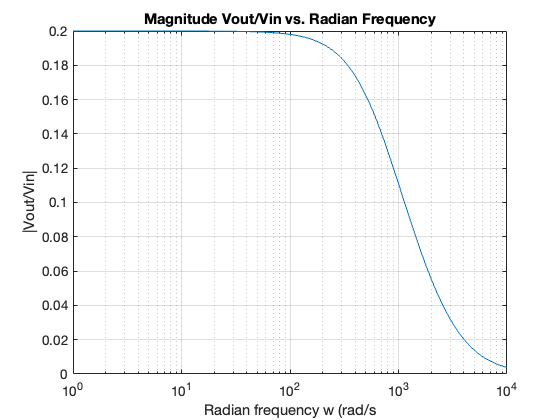

In [9]:
semilogx(w, abs(Gs))
xlabel('Radian frequency w (rad/s')
ylabel('|Vout/Vin|')
title('Magnitude Vout/Vin vs. Radian Frequency')
grid

## Using Transfer Functions in MATLAB for System Analysis

Please use the file [tf_matlab.m](https://cpjobling.github.io/eg-247-textbook/laplace_transform/matlab/tf_matlab.m) to explore the Transfer Function features provide by MATLAB. Open the file as a Live Script to see a nicely formatted document.

## Using Transfer Functions in Simulink for System Simulation

![Using Transfer Functions in Simulink for System Simulation](pictures/sim_tf.png)

The Simulink transfer function (**`Transfer Fcn`**) block implements a transfer function

The transfer function block represents a general input output function

$$G(s) = \frac{N(s)}{D(s)}$$

and is not specific nor restricted to circuit analysis.

It can, however be used in modelling and simulation studies.

### Example

Recast Example 7 as a MATLAB problem using the LTI Transfer Function block. 

For simplicity use parameters $R_1 = R_2 = R_3 = 1\; \Omega$, and $C_1 = C_2 = 1$ F.

Calculate the step response using the LTI functions.

Verify the result with Simulink.

The Matlab solution: [example8.m](https://cpjobling.github.io/eg-247-textbook/laplace_transform/matlab/example8.m)

#### MATLAB Solution
From a previous analysis the transfer function is:

$$G(s) = \frac{V_\mathrm{out}}{V_\mathrm{in}} = \frac{-1}{R_1\left[(1/R_1 + 1/R_2 + 1/R_3 + sC_1)(sR_3C_2) + 1/R_2\right]}$$

so substituting the component values we get:

$$G(s) = \frac{V_{\mathrm{out}}}{V_{\mathrm{in}}} = \frac{-1}{s^2 + 3s + 1}$$

We can find the step response by letting $v_{\mathrm{in}}(t) = u_0(t)$ so that
$V_{\mathrm{in}}(s)=1/s$ then 

$$V_{\mathrm{out}}(s) = \frac{-1}{s^2 + 3s + 1}.\frac{1}{s}$$

We can solve this by partial fraction expansion and inverse Laplace transform
as is done in the text book with the help of MATLAB's `residue` function.

Here, however we'll use the LTI block.

Define the circuit as a transfer function

In [10]:
G = tf([-1],[1 3 1])


G =


       -1


  -------------


  s^2 + 3 s + 1


Continuous-time transfer function.



step response is then:

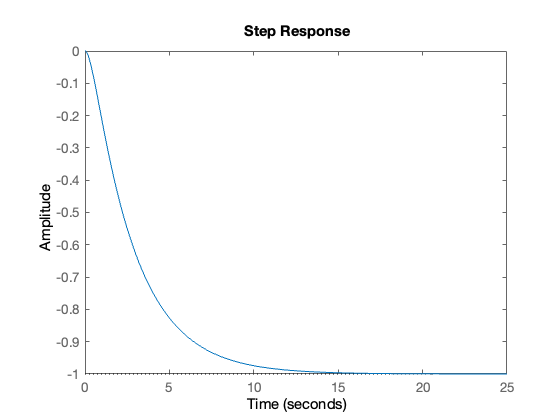

In [11]:
step(G)

Simples!

#### Simulink model

See [example_8.slx](https://cpjobling.github.io/eg-247-textbook/laplace_transform/matlab/example_8.slx)

In [12]:
open example_8

![Simulink model](pictures/ex8_sim.png)

Result

![Simulation result](pictures/ex8_sim_result.png)

Let's go a bit further by finding the frequency response:

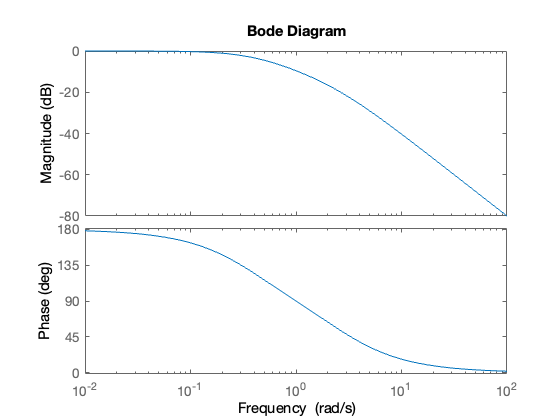

In [13]:
bode(G)

## Reference 

See [Bibliography](/zbib).

## Agenda

* Transfer Functions

* A Couple of Examples

* Circuit Analysis Using MATLAB LTI Transfer Function Block

* Circuit Simulation Using Simulink Transfer Function Block

In [14]:
% Matlab setup
clear all
cd ../matlab 
pwd
format compact

ans =
    '/Users/eechris/code/src/github.com/cpjobling/eg-150-textbook/laplace_transform/matlab'


## Transfer Functions for Circuits

### Example 6

Derive an expression for the transfer function $G(s)$ for the circuit below. In this circuit $R_g$ represents the internal resistance of the applied (voltage) source $v_s$, and $R_L$ represents the resistance of the load that consists of $R_L$, $L$ and $C$.

<img title="Circuit for Example 6" src="pictures/example6.png" width="50%" />

<pre style="border: 2px solid blue">















</pre>

### Sketch of Solution for Example 6

* Replace $v_s(t)$, $R_g$, $R_L$, $L$ and $C$ by their transformed (*complex frequency*) equivalents: $V_s(s)$, $R_g$, $R_L$, $sL$ and $1/(sC)$
* Use the *Voltage Divider Rule* to determine $V_\mathrm{out}(s)$ as a function of $V_s(s)$ 
* Form $G(s)$ by writing down the ratio $V_\mathrm{out}(s)/V_s(s)$

### Worked solution for Example 6

Pencast: [ex6.pdf](https://cpjobling.github.io/eg-247-textbook/laplace_transform/worked_examples/ex6.pdf) - open in Adobe Acrobat Reader.

### Answer for Example 6

$$G(s) = \frac{V_\mathrm{out}(s)}{V_s(s)} = \frac{R_L + sL + 1/sC}{R_g + R_L + sL + 1/sC}.$$

### Example 7

Compute the transfer function for the op-amp circuit shown below in terms of the circuit constants $R_1$, $R_2$, $R_3$, $C_1$ and $C_2$. Then replace the complex variable $s$ with $j\omega$, and the circuit constants with their numerical values and plot the magnitude

$$\left|G(j\omega)\right| = \frac{\left|V_{\mathrm{out}}(j\omega)\right|}{\left|V_{\mathrm{in}}(j\omega)\right|}$$

versus radian frequency $\omega$ rad/s.

<img alt="Circuit for Example 7" src="pictures/example7.png" height="50%" />

<pre style="border: 2px solid blue">















</pre>

### Sketch of Solution for Example 7

* Replace the components and voltages in the circuit diagram with their complex frequency equivalents
* Use nodal analysis to determine the voltages at the nodes either side of the 50K resistor $R_3$
* Note that the voltage at the input to the op-amp is a virtual ground
* Solve for $V_{\mathrm{out}}(s)$ as a function of $V_{\mathrm{in}}(s)$
* Form the reciprocal $G(s) = V_{\mathrm{out}}(s)/V_{\mathrm{in}}(s)$
* Use MATLAB to calculate the component values, then replace $s$ by $j\omega$.
* Plot 
    $$\left|G(j\omega)\right|$$
  on log-linear "paper".

### Worked solution for Example 7

Pencast: [ex7.pdf](https://cpjobling.github.io/eg-247-textbook/laplace_transform/worked_examples/ex7.pdf) - open in Adobe Acrobat Reader.

### Answer for Example 7

$$G(s) = \frac{V_\mathrm{out}(s)}{V_\mathrm{in}(s)} = \frac{-1}{R_1\left(\left(1/R_1 + 1/R_2 + 1/R_3 + sC_1\right)\left(sC_2R_3\right)+1/R_2\right)}.$$

### The Matlab Bit

See attached script: [solution7.m](https://cpjobling.github.io/eg-247-textbook/laplace_transform/matlab/solution7.m).

#### Week 3: Solution 7

In [15]:
syms s;

In [16]:
R1 = 200*10^3; % 200 kOhm 
R2 = 40*10^3; % 40 kOhm
R3 = 50*10^3; % 50 kOhm

C1 = 25*10^(-9); % 25 nF
C2 = 10*10^(-9); % 10 nF

In [17]:
den = R1*((1/R1+ 1/R2 + 1/R3 + s*C1)*(s*R3*C2) + 1/R2);
simplify(den)

ans =


100*s*((7555786372591433*s)/302231454903657293676544 + 1/20000) + 5


Result is: `100*s*((7555786372591433*s)/302231454903657293676544 + 1/20000) + 5`

Simplify coefficients of s in denominator

In [18]:
format long
denG = sym2poly(ans)

denG =
   0.000002500000000   0.005000000000000   5.000000000000000


In [19]:
numG = -1;

Plot

For convenience, define coefficients $a$ and $b$:

In [20]:
a = denG(1);
b = denG(2);

In [21]:
w = 1:10:10000;

$$G(j\omega) = \frac{-1}{a\omega^2 - jb\omega + 5}$$

In [22]:
Gw = -1./(a*w.^2 - j.*b.*w + denG(3));

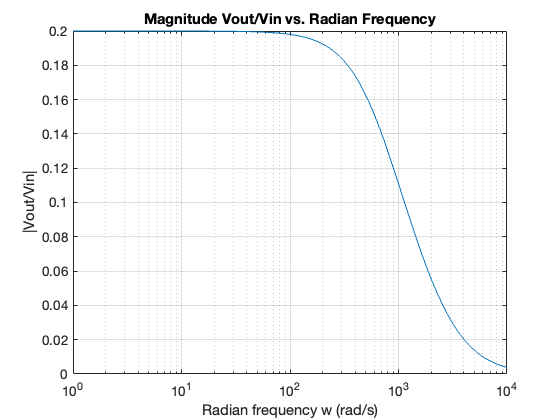

In [23]:
semilogx(w, abs(Gw))
xlabel('Radian frequency w (rad/s)')
ylabel('|Vout/Vin|')
title('Magnitude Vout/Vin vs. Radian Frequency')
grid

## Using Transfer Functions in Matlab for System Analysis

Please use the file [tf_matlab.m](https://cpjobling.github.io/eg-247-textbook/laplace_transform/matlab/tf_matlab.m) to explore the Transfer Function features provide by Matlab. Use the *publish* option to generate a nicely formatted document.

## Using Transfer Functions in Simulink for System Simulation

![Using Transfer Functions in Simulink for System Simulation](pictures/sim_tf.png)

The Simulink transfer function (**`Transfer Fcn`**) block shown above implements a transfer function representing a general
input output function

$$G(s) = \frac{N(s)}{D(s)}$$

that it is not specific nor restricted to circuit analysis. It can, however be used in modelling and simulation studies.

### Example

Recast Example 7 as a MATLAB problem using the LTI Transfer Function block. 

For simplicity use parameters $R_1 = R_2 = R_3 = 1\; \Omega$, and $C_1 = C_2 = 1$ F.

Calculate the step response using the LTI functions.

Verify the result with Simulink.

The Matlab solution: [example8.m](https://cpjobling.github.io/eg-247-textbook/laplace_transform/matlab/example8.m)

#### MATLAB Solution
From a previous analysis the transfer function is:

$$G(s) = \frac{V_\mathrm{out}}{V_\mathrm{in}} = \frac{-1}{R_1\left[(1/R_1 + 1/R_2 + 1/R_3 + sC_1)(sR_3C_2) + 1/R_2\right]}$$

so substituting the component values we get:

$$G(s) = \frac{V_{\mathrm{out}}}{V_{\mathrm{in}}} = \frac{-1}{s^2 + 3s + 1}$$

We can find the step response by letting $v_{\mathrm{in}}(t) = u_0(t)$ so that
$V_{\mathrm{in}}(s)=1/s$ then 

$$V_{\mathrm{out}}(s) = \frac{-1}{s^2 + 3s + 1}.\frac{1}{s}$$
 
We can solve this by partial fraction expansion and inverse Laplace transform
as is done in the text book with the help of Matlab's `residue` function.

Here, however we'll use the LTI block that was introduced in the lecture.

Define the circuit as a transfer function

In [24]:
G = tf([-1],[1 3 1])


G =


       -1


  -------------


  s^2 + 3 s + 1


Continuous-time transfer function.



step response is then:

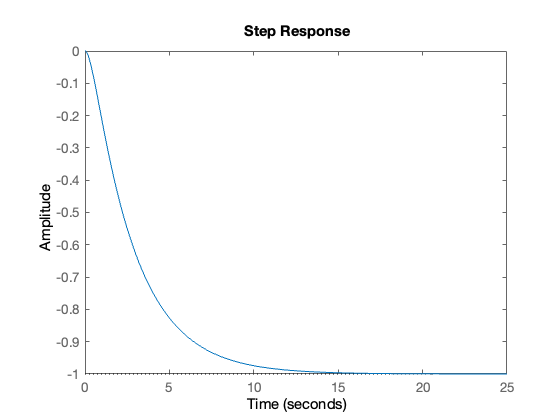

In [25]:
step(G)

Simples!

#### Simulink model

See [example_8.slx](https://cpjobling.github.io/eg-247-textbook/laplace_transform/matlab/example_8.slx)

In [26]:
open example_8

![Simulink model](pictures/ex8_sim.png)

Result

![Simulation result](pictures/ex8_sim_result.png)

Let's go a bit further by finding the frequency response:

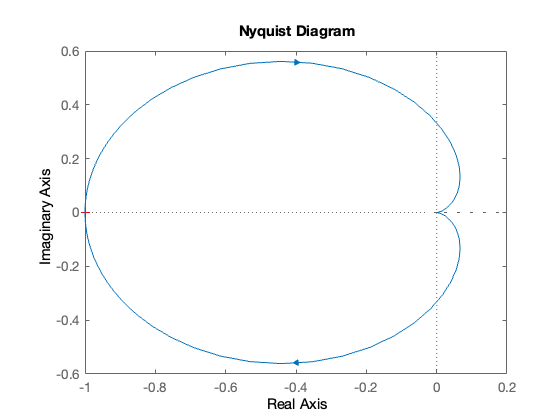

In [27]:
%bode(G)
nyquist(G)
%rlocus(G)

## Matlab Solutions

For convenience, single script MATLAB solutions to the examples are provided and can be downloaded from the accompanying [MATLAB](https://github.com/cpjobling/eg-247-textbook/tree/master/laplace_transform/matlab) folder.

* Solution 7 [[solution7.m](https://cpjobling.github.io/eg-247-textbook/laplace_transform/matlab/solution7.m)]
* Example 8  [[example8.m](https://cpjobling.github.io/eg-247-textbook/laplace_transform/matlab/example8.m)]
* Simulink model [[example_8.slx](https://cpjobling.github.io/eg-247-textbook/laplace_transform/matlab/example_8.slx)]

In [28]:
cd ../matlab
ls
open solution7

README.md        ex3_3.m          example_8.slx    solution7.m
convolution_demo ex3_4.m          solution3.m      tf_matlab.m
ex3_1.m          ex3_5.m          solution3.mlx
ex3_2.m          example8.m       solution5.m

